# Sentiment analysis of tweets

In [19]:
# Import libraries
import tweepy
from textblob import TextBlob
import nltk
# For textblob tags
#nltk.download('averaged_perceptron_tagger') # For POS tags
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
 # For noun phrases
#nltk.download('wordnet') # For lemmatize
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [2]:
# Twitter credentials
APIKey = "rn1i0b2dULhTtAGA7985QAaHl"
APISecret = "Vzl9crKXnnjknc4ejJg45PhkZns8pOeEOpswezvp7SGZOOcUdY"
accesToken = "1247490423846776834-SxSXiR3YhimyvULeozOefJ8cj9o5Ht"
accesTokenSecret = "VmfHc3QhAJtEZA9bZwd8yoB37jGgRmQrJ3pOU1Kn8FujC"

In [3]:
# Create authentication object
authenticate = tweepy.OAuthHandler(APIKey, APISecret)

# Set acces token and secret
authenticate.set_access_token(accesToken, accesTokenSecret)

# Create API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "StockTexts", count=100, lang = "en", tweet_mode="extended")

# Print last 5 tweets from account
print("Show 5 recent tweets: \n")
for tweet in posts[0:5]:
    print(tweet.full_text + "\n")

Show 5 recent tweets: 

$PTGX Protagonist Therapeutics, Inc. SEC Filing: Form SC 13G https://t.co/jDhxvfk5m7

$WLK Westlake Chemical Corporation SEC Filing: Form 4 https://t.co/utCCFWLcKE

$AUPH Aurinia Pharmaceuticals Inc SEC Filing: Form SC 13G/A https://t.co/3bC64GMNMz

$OMER Omeros Corporation SEC Filing: Form SC 13G/A https://t.co/MGNmafy9CT

$CBKM Consumers Bancorp, Inc. SEC Filing: Form 8-K https://t.co/poY1njiX5F



In [7]:
# Create a dataframe with column called called tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show df head
df.head()

,Tweets
0,"$PTGX Protagonist Therapeutics, Inc. SEC Filin..."
1,$WLK Westlake Chemical Corporation SEC Filing:...
2,$AUPH Aurinia Pharmaceuticals Inc SEC Filing: ...
3,$OMER Omeros Corporation SEC Filing: Form SC 1...
4,"$CBKM Consumers Bancorp, Inc. SEC Filing: Form..."


In [8]:
# Clean up the text

#Create function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @ mentions
    text = re.sub(r'#', '', text) # Remove the # symbol
    text = re.sub(r'RT[\s]+', '', text) #Remove retweet
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show
df.head()

,Tweets
0,"$PTGX Protagonist Therapeutics, Inc. SEC Filin..."
1,$WLK Westlake Chemical Corporation SEC Filing:...
2,$AUPH Aurinia Pharmaceuticals Inc SEC Filing: ...
3,$OMER Omeros Corporation SEC Filing: Form SC 1...
4,"$CBKM Consumers Bancorp, Inc. SEC Filing: Form..."


In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show
df.head()

,Tweets,Subjectivity,Polarity
0,"$PTGX Protagonist Therapeutics, Inc. SEC Filin...",0.6,-0.1
1,$WLK Westlake Chemical Corporation SEC Filing:...,0.6,-0.1
2,$AUPH Aurinia Pharmaceuticals Inc SEC Filing: ...,0.6,-0.1
3,$OMER Omeros Corporation SEC Filing: Form SC 1...,0.6,-0.1
4,"$CBKM Consumers Bancorp, Inc. SEC Filing: Form...",0.6,-0.1


In [20]:
# Find POS tags
def getTags(text):
    return TextBlob(text).tags

def getNP(text):
    return TextBlob(text).noun_phrases

def getSS(text):
    return TextBlob(text).synsets()

df['Tags'] = df['Tweets'].apply(getTags)

df['NP'] = df['Tweets'].apply(getNP)

#df['SynSet'] = df['Tweets'].apply(getSS)

wordList = df['Tags'][0]
nounList = df['NP'][0]

npList = list()
for word, tag in df['Tags'][0]:
  if tag == 'NNP':
    npList.append(word.lemmatize())



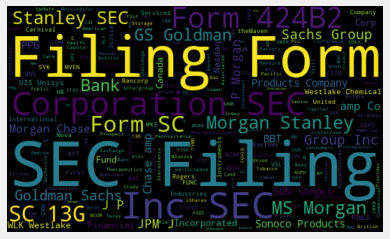

In [23]:
# Word cloud
allWords = ' '.join(twts for twts in df['Tweets'])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size =199).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
# Create function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show df
df

,Tweets,Subjectivity,Polarity,Tags,NP,Analysis
0,"$PTGX Protagonist Therapeutics, Inc. SEC Filin...",0.6,-0.1,"[(PTGX, NNP), (Protagonist, NNP), (Therapeutic...","[ptgx protagonist therapeutics, sec filing, fo...",Negative
1,$WLK Westlake Chemical Corporation SEC Filing:...,0.6,-0.1,"[(WLK, NNP), (Westlake, NNP), (Chemical, NNP),...","[wlk westlake, chemical corporation, sec filin...",Negative
2,$AUPH Aurinia Pharmaceuticals Inc SEC Filing: ...,0.6,-0.1,"[(AUPH, NNP), (Aurinia, NNP), (Pharmaceuticals...","[auph aurinia pharmaceuticals inc sec filing, ...",Negative
3,$OMER Omeros Corporation SEC Filing: Form SC 1...,0.6,-0.1,"[(OMER, NNP), (Omeros, NNP), (Corporation, NNP...","[omer omeros, sec filing, form sc]",Negative
4,"$CBKM Consumers Bancorp, Inc. SEC Filing: Form...",0.6,-0.1,"[(CBKM, NNP), (Consumers, NNP), (Bancorp, NNP)...","[cbkm consumers bancorp, sec filing, form]",Negative
...,...,...,...,...,...,...
95,"$CAT Caterpillar, Inc. SEC Filing: Form 10-K",0.6,-0.1,"[(CAT, NNP), (Caterpillar, NNP), (Inc., NNP), ...","[cat caterpillar, sec filing, form]",Negative
96,$MS Morgan Stanley SEC Filing: Form 424B2,0.6,-0.1,"[(MS, NNP), (Morgan, NNP), (Stanley, NNP), (SE...","[ms morgan stanley sec filing, form]",Negative
97,$HR Healthcare Realty Trust Incorporated SEC F...,0.6,-0.1,"[(HR, NNP), (Healthcare, NNP), (Realty, NNP), ...","[hr healthcare realty, incorporated sec filing...",Negative
98,$CRESY Cresud S.A.C.I.F. y A. SEC Filing: Form...,0.6,-0.1,"[(CRESY, NNP), (Cresud, NNP), (S.A.C.I.F, NNP)...","[cresy cresud s.a.c.i.f, a. sec filing, form]",Negative


In [25]:
# Print sorted tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, 100):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+') '+ sortedDF['Tweets'][i])
        print()
        j = j+1

1) $PEI Pennsylvania Real Estate Investment Trust SEC Filing: Form SC 13D 

2) $FUNC First United Corporation SEC Filing: Form 4 

3) $FUNC First United Corporation SEC Filing: Form 4/A 



<function matplotlib.pyplot.show(close=None, block=None)>

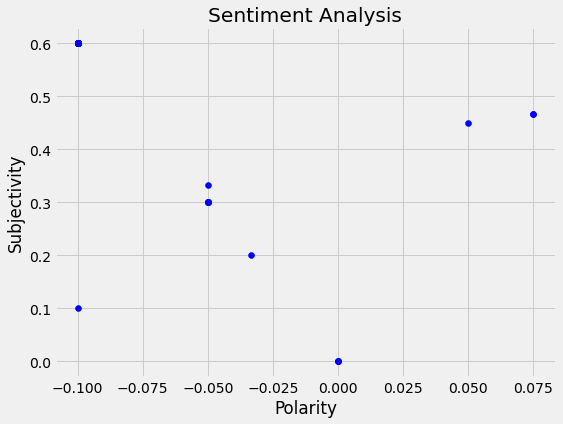

In [26]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [27]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

str((ptweets.shape[0] / df.shape[0])*100)+'%'

'3.0%'

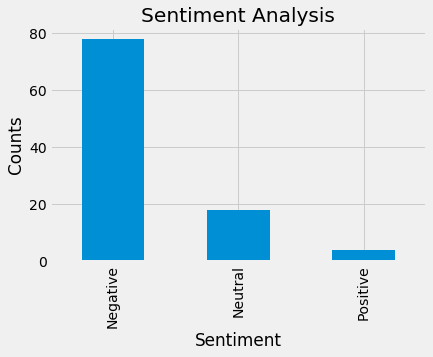

In [30]:
# Show value count

df['Analysis'].value_counts()

#plot and visualise counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()